# Data Visualization with seaborn

In [ ]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# orders_qu.csv
url = "https://drive.google.com/file/d/143CzG5DriVSPMkaL1UP4k3Y80oS8fgbV/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders_qu = pd.read_csv(path)

# orderlines_qu.csv
url = "https://drive.google.com/file/d/1yWO-mQfxQtnSZdCgdNlIEUrZSCW1HN5O/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines_qu = pd.read_csv(path)

# products_cl.csv
url = "https://drive.google.com/file/d/1s7Lai4NSlsYjGEPg1QSOUJobNYVsZBOJ/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_cl = pd.read_csv(path)

# brands.csv
url = "https://drive.google.com/file/d/1XGyabaa4mAkjixMk3XPgx_14OoSse3rs/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
brands = pd.read_csv(path)

# Challenges:
Let's start combining  `.groupby()`, `datetime`, and `seaborn`


In [ ]:
ol_df = orderlines_qu.copy()

In [ ]:
ol_df["short"] = ol_df["sku"].str[:3]

In [ ]:
ol_with_brands_df = ol_df.merge(brands,
                                how="left",
                                on="short")
ol_with_brands_df.head(3)

,id,id_order,product_id,product_quantity,sku,unit_price,date,short,long
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,OWC,OWC
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,IOT,iOttie
2,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,APP,Apple


In [ ]:
brands_10_most_sold_df = (
                         ol_with_brands_df.groupby("long", as_index=False)
                         ["product_quantity"].sum()
                         .nlargest(10, "product_quantity")
                         )
brands_10_most_sold_df

,long,product_quantity
5,Apple,11156
99,OWC,3857
161,Western Digital,2404
9,Belkin,2279
67,LaCie,2130
19,Crucial,2070
128,Satechi,1824
160,Wacom,1816
106,Pack,1710
91,NewerTech,1648


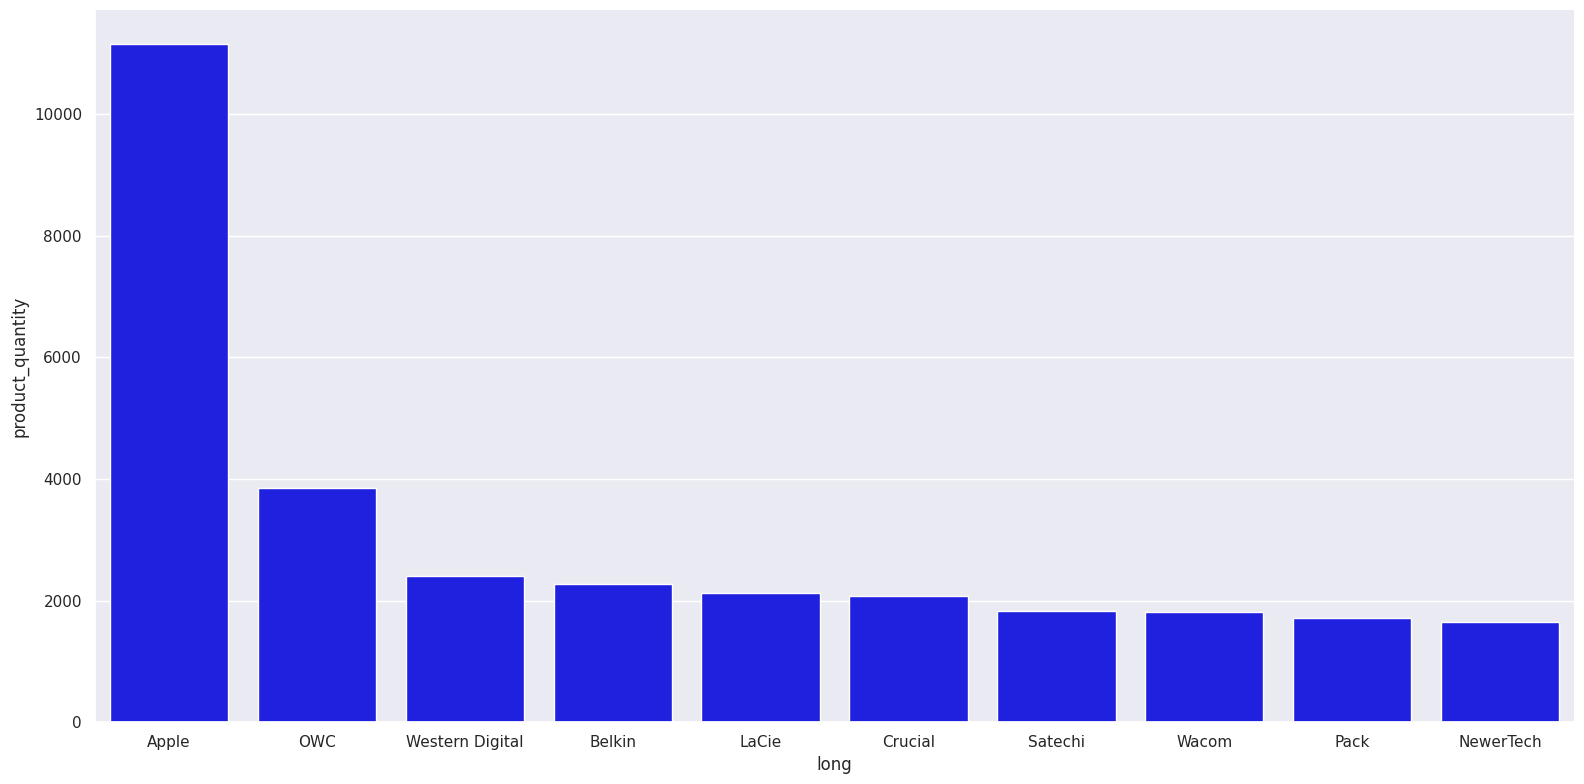

In [ ]:
sns.catplot(kind="bar",
            data=brands_10_most_sold_df,
            x="long",
            y="product_quantity",
            height=8,
            aspect=2,
            color="blue");

2. Create a scatter plot to explore the relationship between the recommended price for a product (`products.price`) and the price that products actually sold for (`orderlines.unit_price`)


In [ ]:
ol_df = orderlines_qu.copy()

In [ ]:
ol_with_products_df = ol_df.merge(products_cl,
                                  how="left",
                                  on="sku")

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
ol_with_products_df["higher_same_lower"] = "same price"
ol_with_products_df.loc[ol_with_products_df["unit_price"] > ol_with_products_df["price"], "higher_same_lower"] = "higher price"
ol_with_products_df.loc[ol_with_products_df["unit_price"] < ol_with_products_df["price"], "higher_same_lower"] = "lower price"

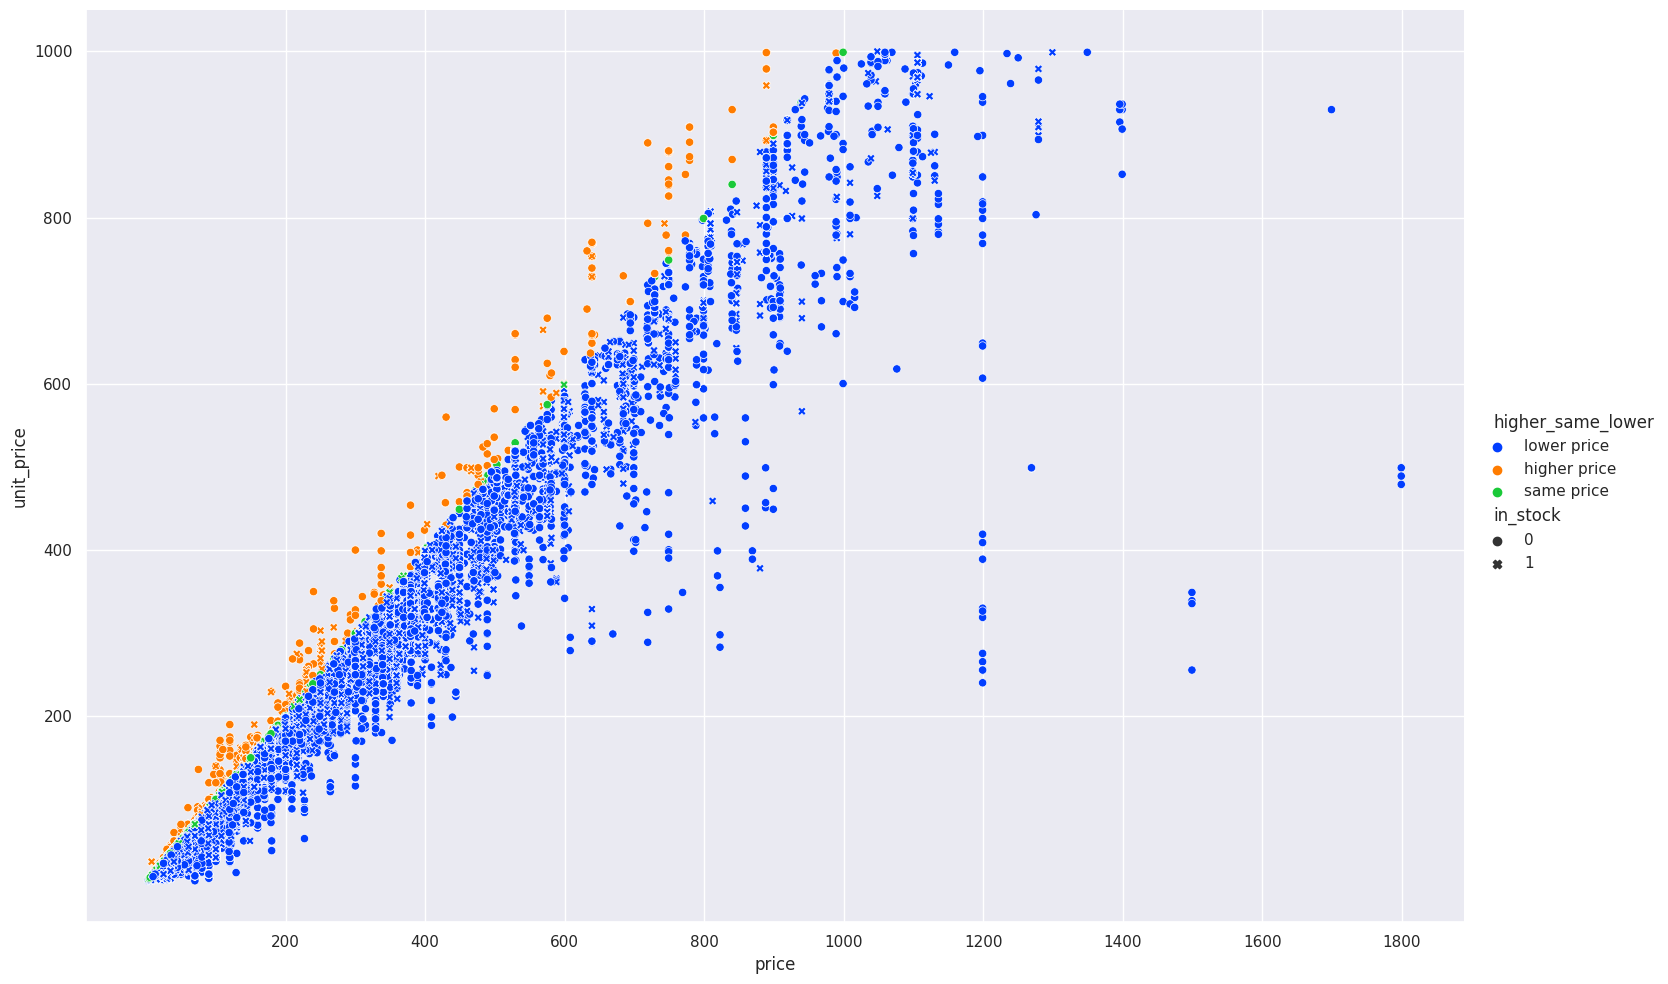

In [ ]:
sns.relplot(data=ol_with_products_df,
           x="price",
           y="unit_price",
           hue="higher_same_lower",
           style="in_stock",
           height=10,
           aspect=1.5,
           palette="bright");

plt.xticks([200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800]);
plt.yticks([200, 400, 600, 800, 1000]);

3.Display the average daily price of an order on a line plot.


In [ ]:
o_df = orders_qu.copy()

In [ ]:
daily_average_df = o_df.groupby(["order_id", "created_date"], as_index=False).agg({"total_paid":"mean"})

In [ ]:
daily_average_df["created_date"] = pd.to_datetime(daily_average_df["created_date"])

In [ ]:
daily_average_df = daily_average_df.groupby(daily_average_df.created_date.dt.date).agg({"total_paid":"mean"}).reset_index()

In [ ]:
daily_average_df.head()

,created_date,total_paid
0,2017-01-01,174.867813
1,2017-01-02,134.554561
2,2017-01-03,137.966069
3,2017-01-04,148.123217
4,2017-01-05,100.327302


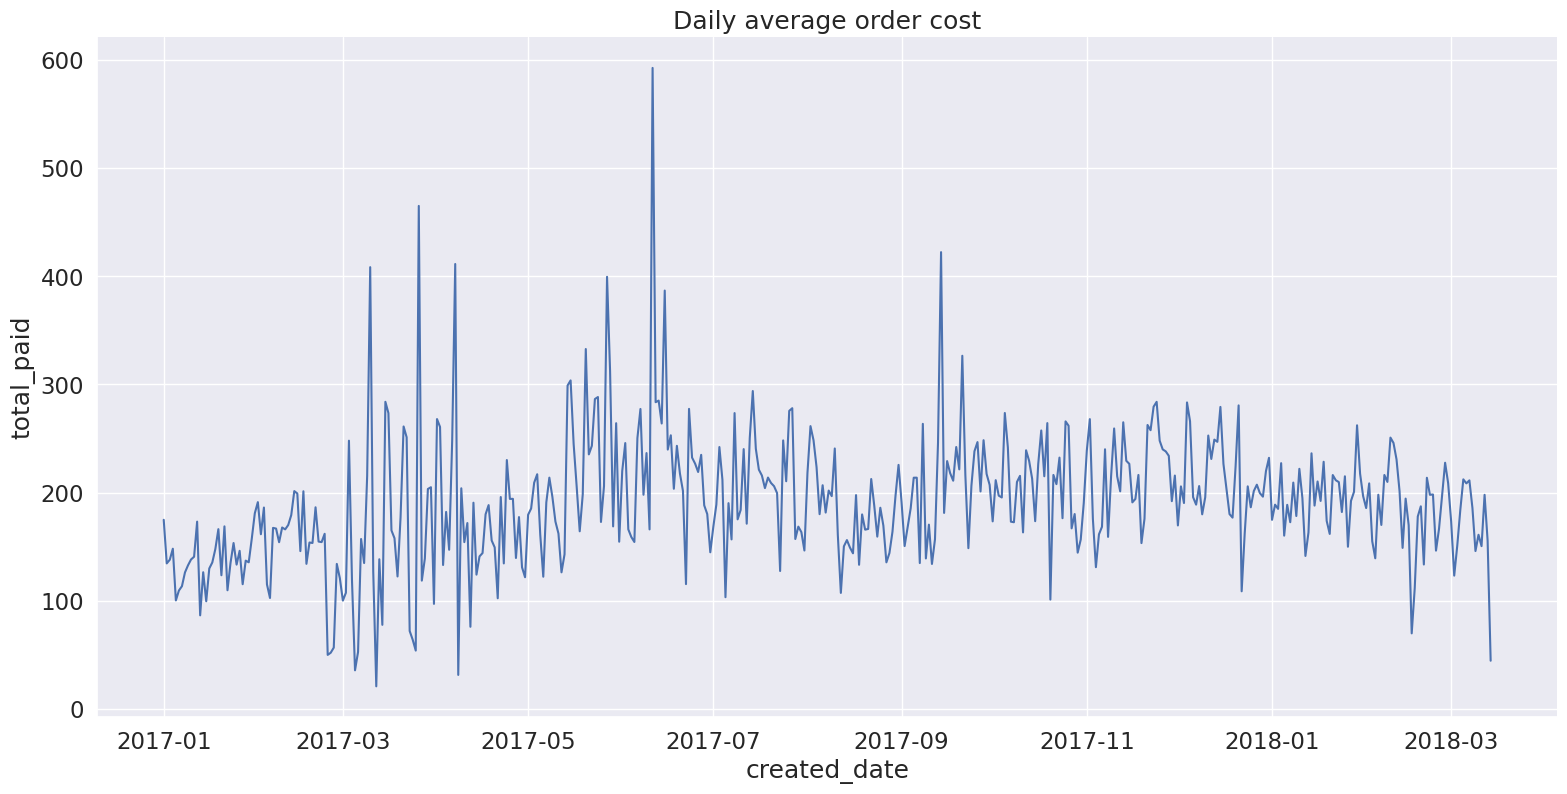

In [ ]:
sns.set(font_scale=1.5)

(
sns.relplot(kind="line",
            data=daily_average_df,
            x="created_date",
            y="total_paid",
            height=8,
            aspect=2)
    .set(title="Daily average order cost")
);

4.Make a bar plot for the top 10 products sold in January 2017 & the top 10 products sold in January 2018.

In [ ]:
ol_df = orderlines_qu.copy()

In [ ]:
ol_df["date"] = pd.to_datetime(ol_df["date"])

In [ ]:
january_df = ol_df.loc[ol_df["date"].dt.month == 1, :].copy()

In [ ]:
january_df["year"] = january_df["date"].dt.year

In [ ]:
top_10_2_years_df = (
                    january_df
                    .groupby(["year", "sku"], as_index=False)
                    ["product_quantity"]
                    .sum()
                    .sort_values(by=["year", "product_quantity"], ascending=False)
                    .groupby("year").head(10)
                    )

In [ ]:
top_10_2_years_names_df = top_10_2_years_df.merge(products_cl,
                                                  how="left",
                                                  on="sku")

**Suggested improvement:** By sharing the y-axis (default on figure-level plots) seaborn allows us to compare the years, so we can see what has changed in the top 10 year on year. Let's also give the x and y axis better names.

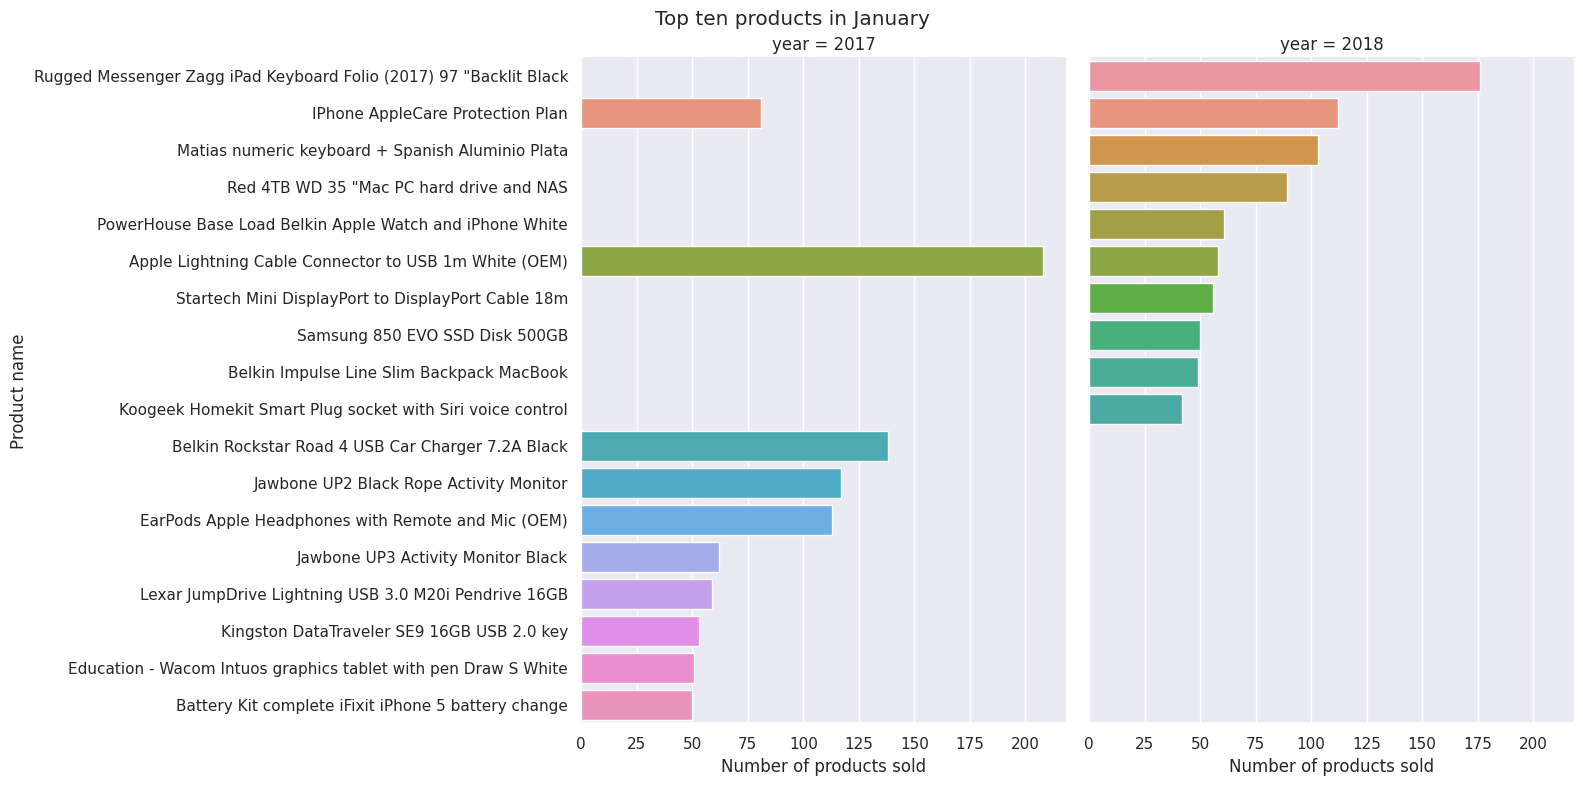

In [ ]:
(
sns.catplot(data=top_10_2_years_names_df,
                 x="product_quantity",
                 y="name",
                 col="year",
                 kind="bar",
                 height=8)
    .set_axis_labels("Number of products sold",
                     "Product name")
    .figure.suptitle("Top ten products in January")
    .figure.subplots_adjust(top=.92)
)

5.Find the top 10 brands that have generated the most revenue in the snapshot. Show the daily revenue generated by each of these brands on a line plot, use a seperate line for each brand.

In [ ]:
ol_df = orderlines_qu.copy()

In [ ]:
ol_df["short"] = ol_df["sku"].str[:3]

In [ ]:
ol_with_brands_df = ol_df.merge(brands,
                                how="left",
                                on="short")

In [ ]:
top_10_brands_list = (
                      list(
                          ol_with_brands_df
                          .groupby("long", as_index=False)
                          ["unit_price"]
                          .sum()
                          .nlargest(10, "unit_price")
                          ["long"]
                          )
                      )

,long,unit_price
5,Apple,2493926.37
106,Pack,451204.43
67,LaCie,426777.55
99,OWC,422050.64
65,LG,296408.82
161,Western Digital,268089.91
160,Wacom,257583.71
19,Crucial,236398.06
24,Dell,221202.37
144,Synology,164333.45


In [ ]:
ol_with_brands_df["date"] = pd.to_datetime(ol_with_brands_df["date"])

In [ ]:
ol_with_brands_df["date"] = ol_with_brands_df["date"].dt.date

In [ ]:
daily_totals_df = (
                  ol_with_brands_df
                  .loc[ol_with_brands_df["long"].isin(top_10_brands_list), :]
                  .groupby(["date", "long"], as_index=False)
                  ["unit_price"]
                  .sum()
                  )

There's no easy way to relabel the legend, so this is a shortcut. If I didn't perform this step, the legend would be titled `long`

In [ ]:
daily_totals_df.rename(columns={"long": "Company"}, inplace=True)

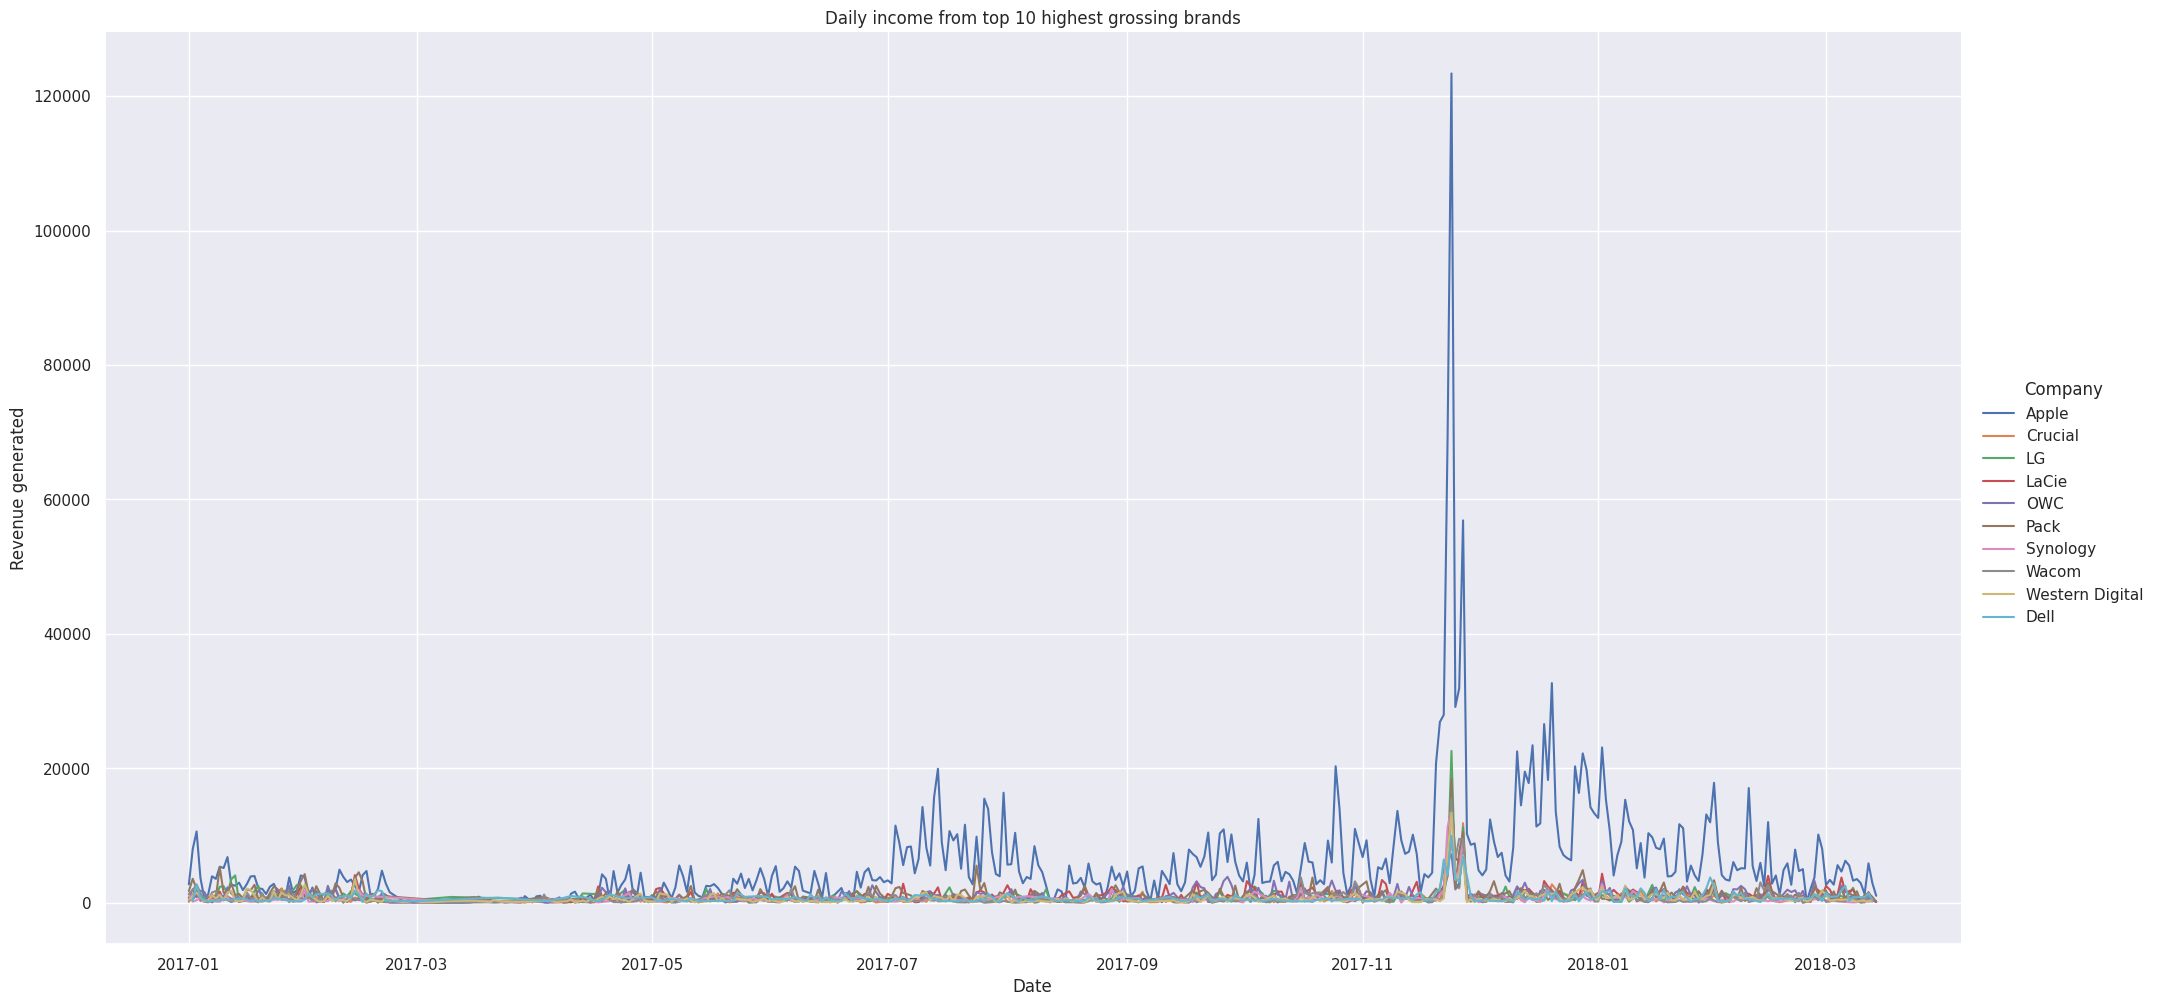

In [ ]:
sns.set_theme(style="darkgrid")

(
sns.relplot(data = daily_totals_df,
            x="date",
            y="unit_price",
            hue="Company",
            kind="line",
            height= 10,
            aspect=2)
    .set_axis_labels("Date",
                     "Revenue generated")
    .set(title="Daily income from top 10 highest grossing brands")
);